In [1]:
import pandas as pd

filePath = "C:\\Users\\lkrei\\Desktop\\Python\\ExercisesDatenanalyse\\Datenanalyse\\Einheit 3\\umfrage.csv"

data = pd.read_csv(filePath, sep=",")

#Print header
print(data.head())

   browser        email    abteilung
0  Firefox  Thunderbird     Vertrieb
1  Firefox      Outlook     Vertrieb
2       IE      Outlook  Entwicklung
3  Firefox      Outlook  Entwicklung
4       IE  Thunderbird  Entwicklung


In [2]:
#Convert the browser column into separate columns with 1 if the value was in this row
data = pd.get_dummies(data, columns=['browser'])
print(data.head())

         email    abteilung  browser_Chrome  browser_Firefox  browser_IE  \
0  Thunderbird     Vertrieb               0                1           0   
1      Outlook     Vertrieb               0                1           0   
2      Outlook  Entwicklung               0                0           1   
3      Outlook  Entwicklung               0                1           0   
4  Thunderbird  Entwicklung               0                0           1   

   browser_Opera  browser_Safari  
0              0               0  
1              0               0  
2              0               0  
3              0               0  
4              0               0  


In [3]:
#Create an tmp array with the label and the absolut sum of the colum
tmp = [['Chrome',data['browser_Chrome'].abs().sum()], 
          ['Firefox',data['browser_Firefox'].abs().sum()], 
          ['IE',data['browser_IE'].abs().sum()], 
          ['Opera',data['browser_Opera'].abs().sum()], 
          ['Safari',data['browser_Safari'].abs().sum()]]

#create a dataframe from the tmp array
factor = pd.DataFrame(tmp, columns = ['Browser', 'Absolut'])
print(factor)

   Browser  Absolut
0   Chrome       16
1  Firefox       17
2       IE       18
3    Opera        4
4   Safari        5


In [4]:
#Calculate the percentage
factor['Percentage'] = round(((factor['Absolut']/factor['Absolut'].sum())*100),1)
print(factor)

   Browser  Absolut  Percentage
0   Chrome       16        26.7
1  Firefox       17        28.3
2       IE       18        30.0
3    Opera        4         6.7
4   Safari        5         8.3


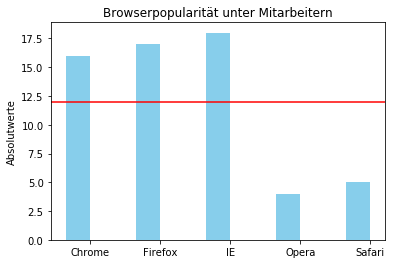

In [27]:
import matplotlib.pyplot as plt
import numpy as np

#define the width of the bar
width = 0.35

#define the xrange
ind = np.arange(len(factor['Browser']))  

#create the subplot
fig, ax = plt.subplots()

#create the bars
rects1 = ax.bar(ind - width/2, factor['Absolut'], width, color='SkyBlue')

#set the ylabel
ax.set_ylabel('Absolutwerte')
#set the title
ax.set_title('Browserpopularität unter Mitarbeitern')
#set the position for the x labels
ax.set_xticks(ind)

#draw a redline at y=12
ax.axhline(y=12, color='r')
#set the x labels
ax.set_xticklabels(('Chrome', 'Firefox', 'IE', 'Opera', 'Safari'))
plt.show()

In [29]:
from scipy.stats import chisquare

#do a chisquate test
chisquare(factor['Absolut'])

Power_divergenceResult(statistic=15.833333333333332, pvalue=0.0032511565578449385)

In [ ]:
#The pWert is 0.003 and below 0.5. The Nullhypothesis will be thrown away